### Admission Prediction Using Different Models


In [202]:
import warnings
warnings.filterwarnings('ignore')

#Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import pickle as pickle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow
import keras
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, classification_report, mean_squared_error 
from livelossplot import PlotLossesKeras

In [203]:
df = pd.read_csv('Admission_Predict.csv')
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [204]:
df = df.drop('Serial No.', axis=1)

In [205]:
df.shape

(400, 8)

In [206]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [198]:
df.columns = df.columns.str.strip()  # removes spaces from all column names

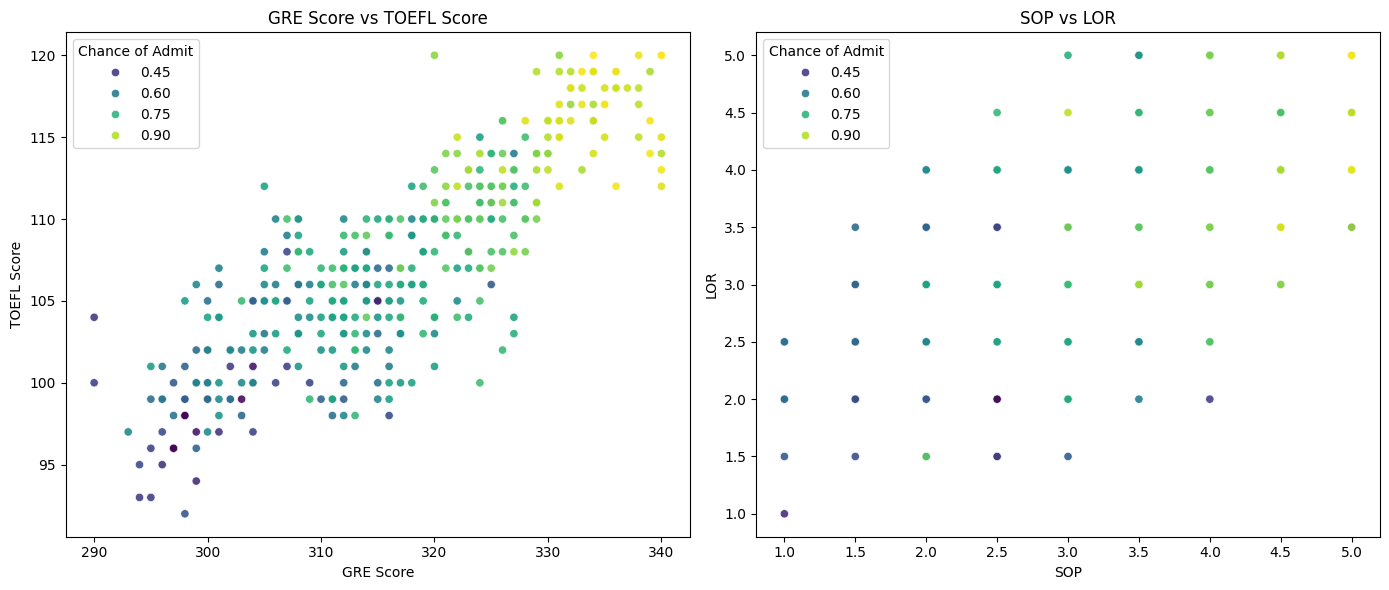

In [182]:
plt.figure(figsize=(14, 6))

# First scatter plot: radius_mean vs texture_mean
plt.subplot(1, 2, 1)
sn.scatterplot(data=df, x="GRE Score", y="TOEFL Score", hue="Chance of Admit", palette="viridis", alpha=0.9)
plt.title("GRE Score vs TOEFL Score")
plt.xlabel("GRE Score" )
plt.ylabel("TOEFL Score")

# Second scatter plot: compactness_mean vs smoothness_mean
plt.subplot(1, 2, 2)
sn.scatterplot(data=df, x="SOP", y="LOR", hue="Chance of Admit", palette="viridis", alpha=0.9)
plt.title("SOP vs LOR")
plt.xlabel("SOP")
plt.ylabel("LOR")

# Show the plots
plt.tight_layout()
plt.show()

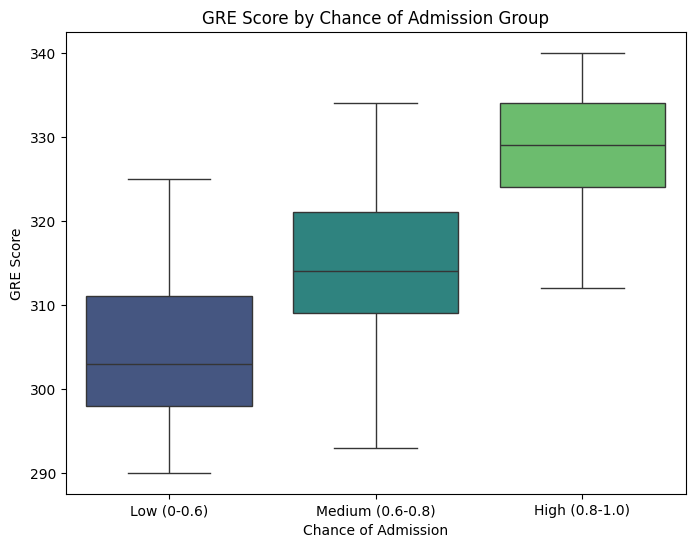

In [188]:
# Group Chance of Admit into categories
df['Admit_Chance_Group'] = pd.cut(df['Chance of Admit'], bins=[0, 0.6, 0.8, 1.0],
                                  labels=['Low (0-0.6)', 'Medium (0.6-0.8)', 'High (0.8-1.0)'])

# Boxplot: GRE Score by grouped Chance of Admit
plt.figure(figsize=(8, 6))
sn.boxplot(data=df, x='Admit_Chance_Group', y='GRE Score', palette='viridis')

plt.title("GRE Score by Chance of Admission Group")
plt.xlabel("Chance of Admission")
plt.ylabel("GRE Score")
plt.show()

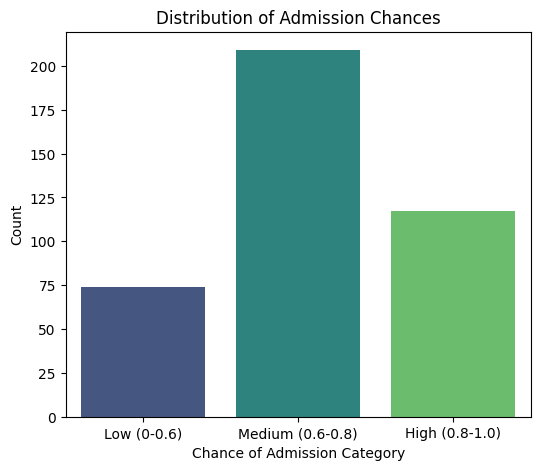

In [189]:
#Plot Histogram
# Bin the 'Chance of Admit' into categories
df['Admit_Chance_Label'] = pd.cut(df['Chance of Admit'], bins=[0, 0.6, 0.8, 1.0],
                                  labels=['Low (0-0.6)', 'Medium (0.6-0.8)', 'High (0.8-1.0)'])

# Plot the binned categories
plt.figure(figsize=(6, 5))
sn.countplot(data=df, x='Admit_Chance_Label', palette='viridis')

plt.title('Distribution of Admission Chances')
plt.xlabel('Chance of Admission Category')
plt.ylabel('Count')
plt.show()

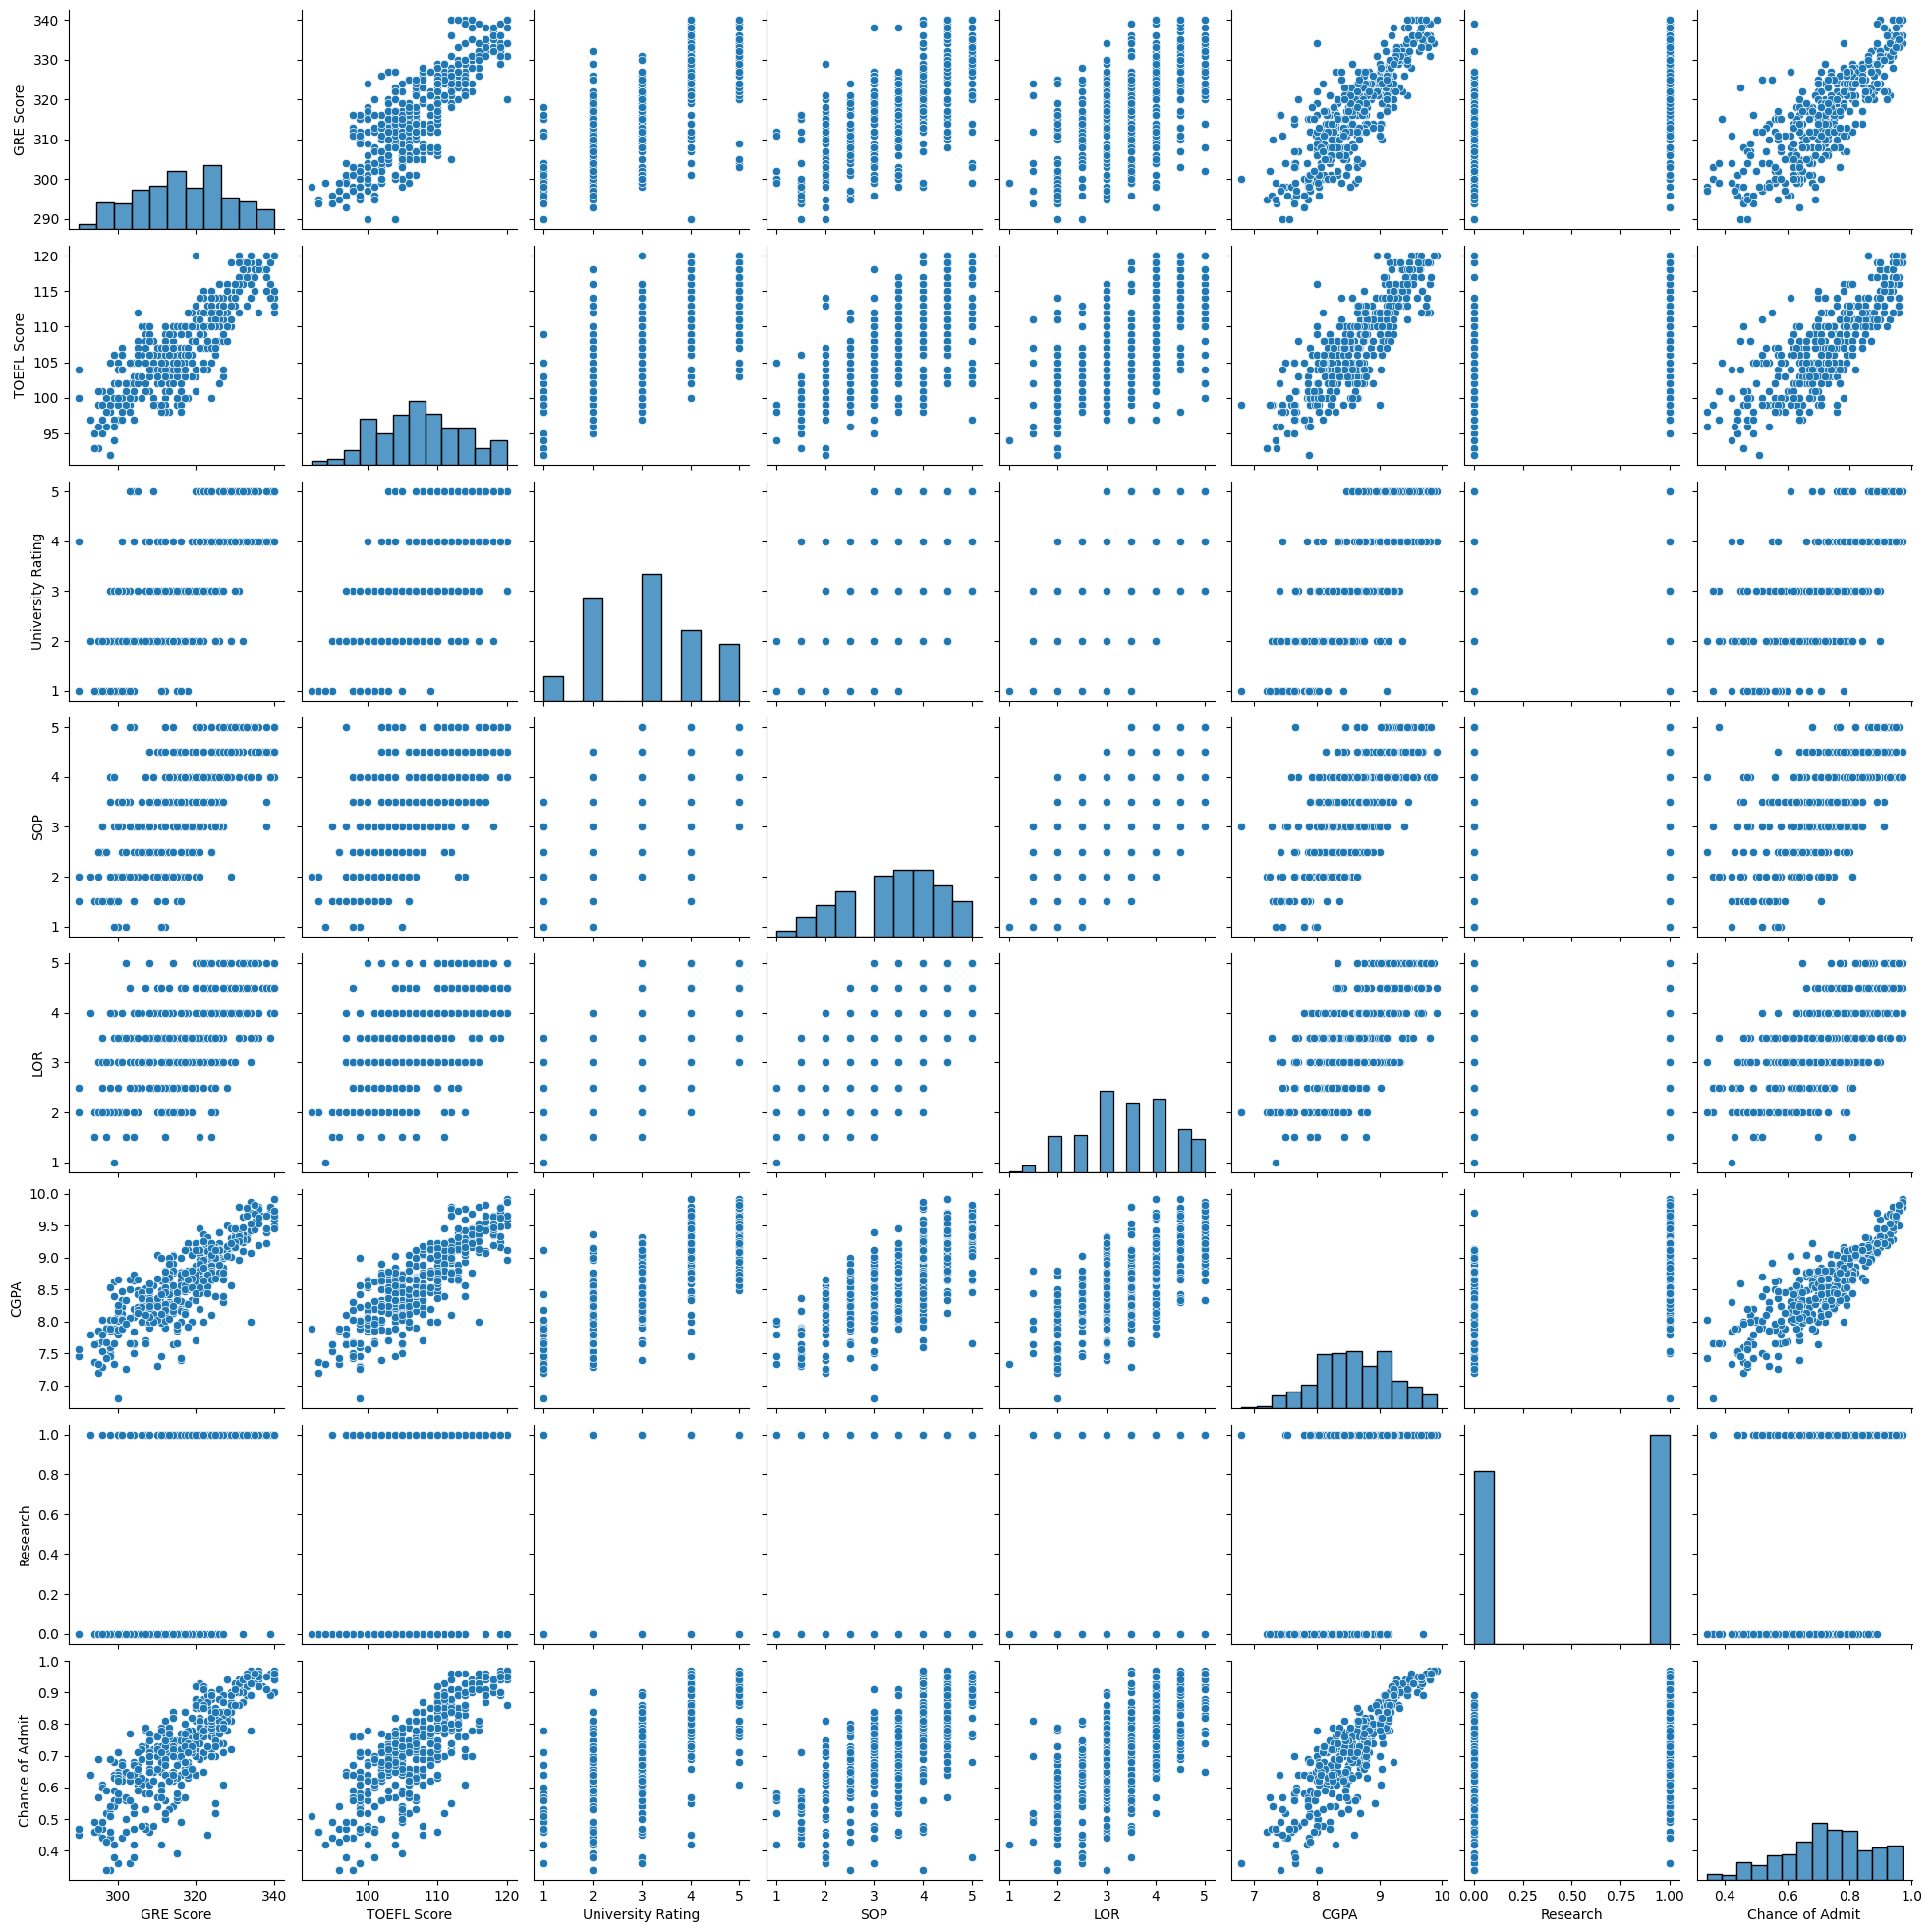

In [199]:
sn.pairplot(df)

In [242]:
#Get your columns and split the dataset first before scaling and then fit and transform only the training dataset, transform the test data
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values 

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [244]:
#Scale your dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Using the Scikit-Learn MLP Regression.

In [239]:
# Design the Network:
from sklearn.neural_network import MLPRegressor
modelANNSKL = MLPRegressor(hidden_layer_sizes =(64,16,),
                     activation = 'relu', 
                     solver = 'adam', 
                     batch_size = 32,
                     max_iter = 200,
                     random_state = 0,
                     verbose = False)

In [240]:
modelANNSKL.fit(X_train, y_train)
scoreANNSKL = modelANNSKL.score(X_test, y_test)
y_predANNSKL = modelANNSKL.predict(X_test)
print("R2:", scoreANNSKL)
mse = mean_squared_error(y_test, y_predANNSKL)
print("Model MSE:", mse)

R2: 0.6583367557477491
Model MSE: 0.008065367459835044


### Using Keras 1

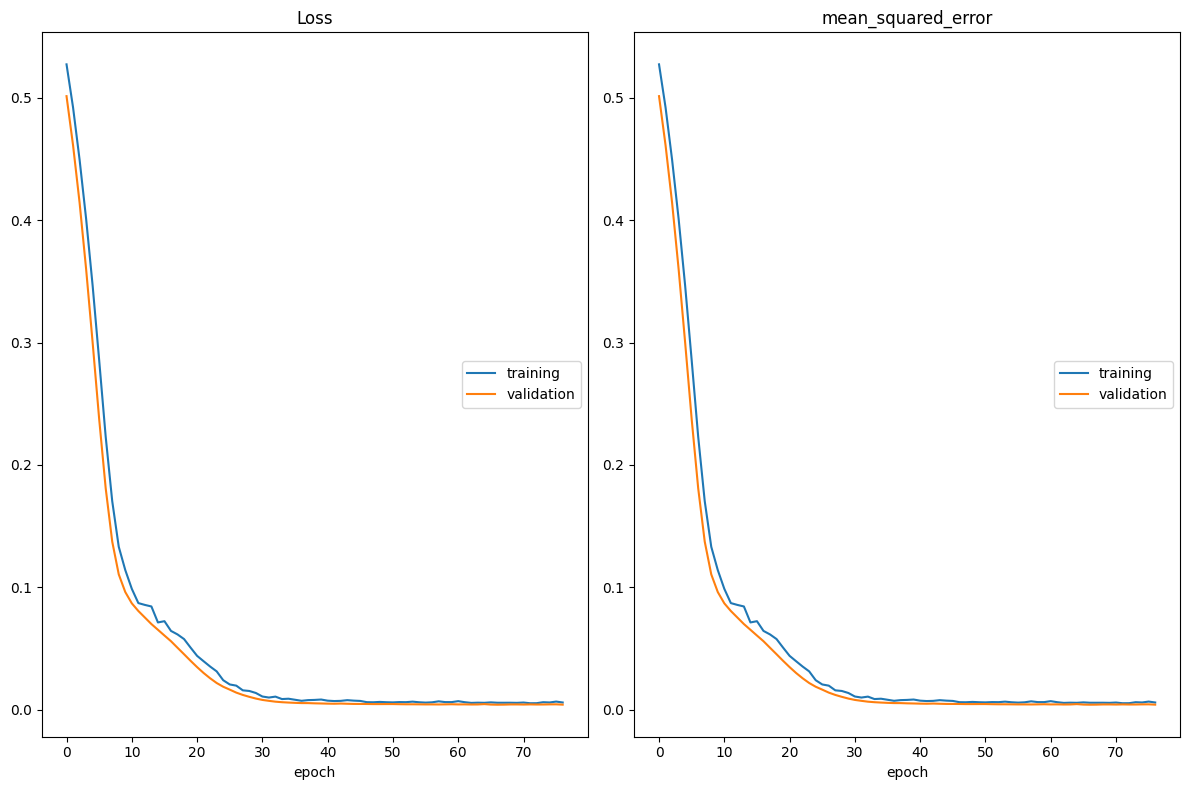

Loss
	training         	 (min:    0.005, max:    0.527, cur:    0.006)
	validation       	 (min:    0.004, max:    0.501, cur:    0.004)
mean_squared_error
	training         	 (min:    0.005, max:    0.527, cur:    0.006)
	validation       	 (min:    0.004, max:    0.501, cur:    0.004)


In [245]:
from keras.layers import Input, Dense
modelANNKeras = Sequential()

# Add the layers and nodes
input_layer = Input(shape=(7,))
modelANNKeras.add(input_layer)
modelANNKeras.add(Dropout(0.05))

hidden_layer = Dense(units=16, activation='relu', kernel_initializer='uniform')
modelANNKeras.add(hidden_layer)
modelANNKeras.add(Dropout(0.05))

output_layer = Dense(units=1, activation='relu', kernel_initializer='uniform')
modelANNKeras.add(output_layer)

# Compile the model
modelANNKeras.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

# Add early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.0001,
                              patience = 10,
                              verbose=0, mode='auto')
#Train the model
modelANNKeras.fit(X_train, y_train,
          batch_size = 32,
          epochs = 100,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras(),callbacks],
          verbose=0)


In [246]:
predictionsANNK = modelANNKeras.predict(X_test)
print("R2:", r2_score(y_test, predictionsANNK))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step 
R2: 0.8198780094832586


#### Using Keras 2

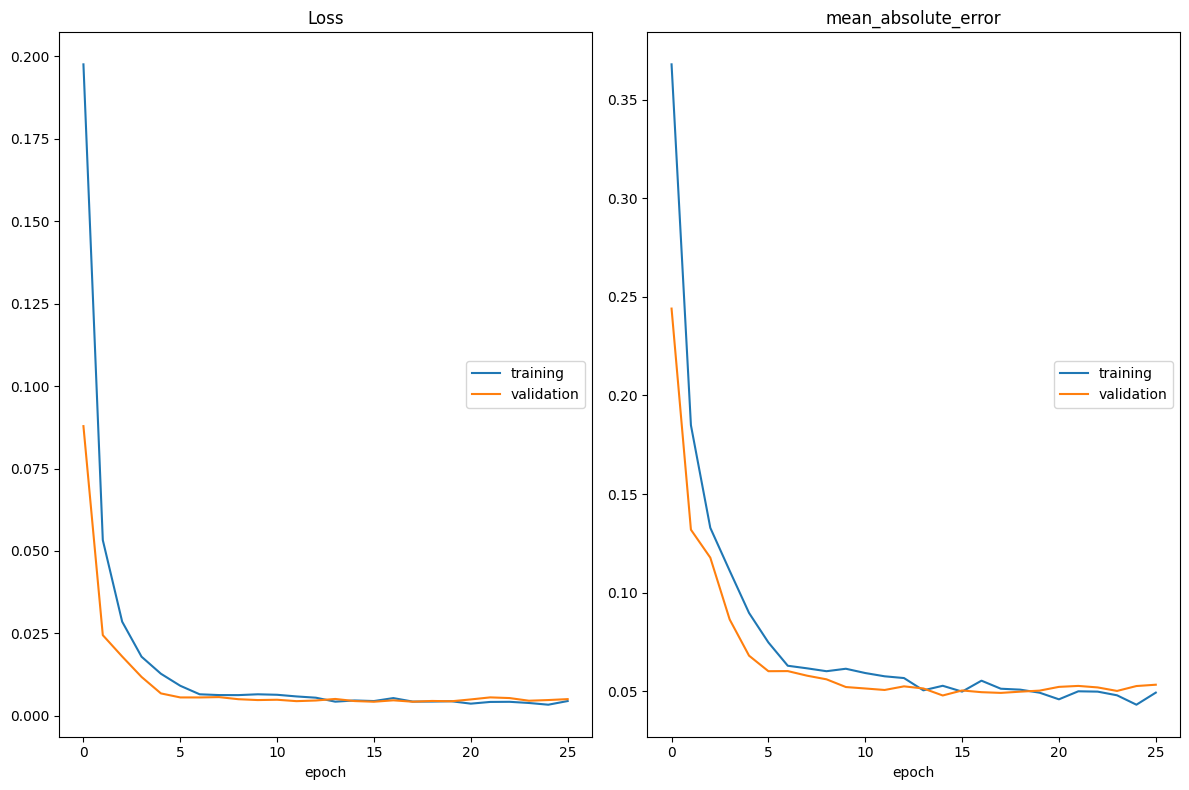

Loss
	training         	 (min:    0.003, max:    0.198, cur:    0.004)
	validation       	 (min:    0.004, max:    0.088, cur:    0.005)
mean_absolute_error
	training         	 (min:    0.043, max:    0.368, cur:    0.049)
	validation       	 (min:    0.048, max:    0.244, cur:    0.053)


In [231]:
from keras.models import Sequential
modelANNKeras2 = Sequential()

# Design the Network
from keras.layers import Dense, Dropout
modelANNKeras2.add(Dense(units=128, activation='relu'))
modelANNKeras2.add(Dropout(0.02))

#Adding Hidden Layer
modelANNKeras2.add(Dense(units=64, activation='relu'))

modelANNKeras2.add(Dense(units=64, activation='relu'))
modelANNKeras2.add(Dropout(0.02))

#Adding Hidden Layer
modelANNKeras2.add(Dense(units=32, activation='relu'))

#Adding Output Layer
modelANNKeras2.add(Dense(units=1,activation='linear'))

# Add early stopping
callbacks = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.0001,
                              patience = 10,
                              verbose=0, mode='auto')
# Compile the Network
modelANNKeras2.compile(optimizer = 'adam',
             loss = "mean_squared_error",
             metrics = ['mean_absolute_error'])

# Train and monitor the model
modelANNKeras2.fit(X_train, y_train,
          batch_size = 20,
          epochs = 200,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras(), callbacks],
          verbose=0)


In [232]:
predictionsANNK2 = modelANNKeras2.predict(X_test)
print("R2:", r2_score(y_test, predictionsANNK2))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step 
R2: 0.7856924709195308


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

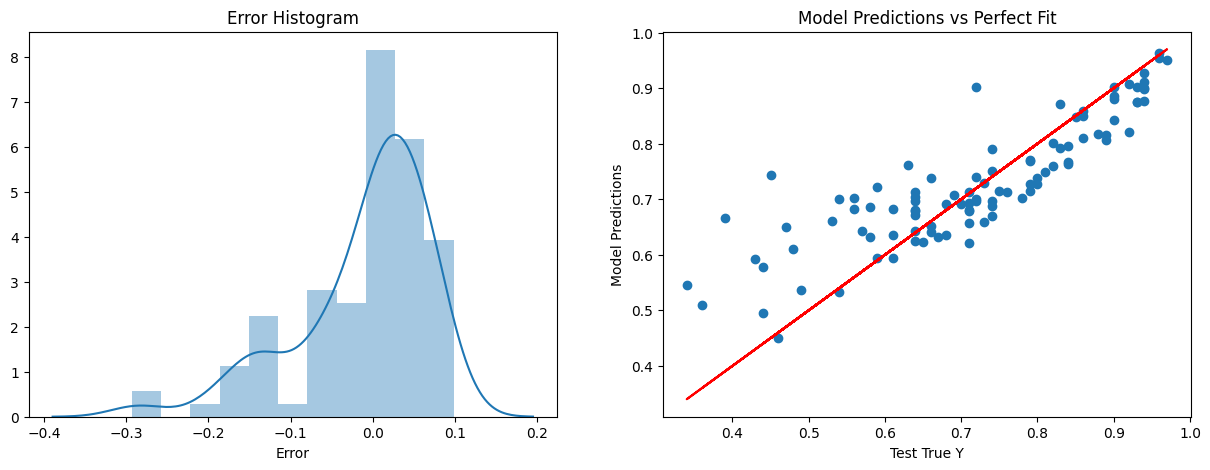

In [235]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictionsANNK)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.reshape(len(y_test), 1) - predictionsANNK
sn.distplot(errors, ax=axes[0])

axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

### Keras1 Model is the best with  82% accuracy

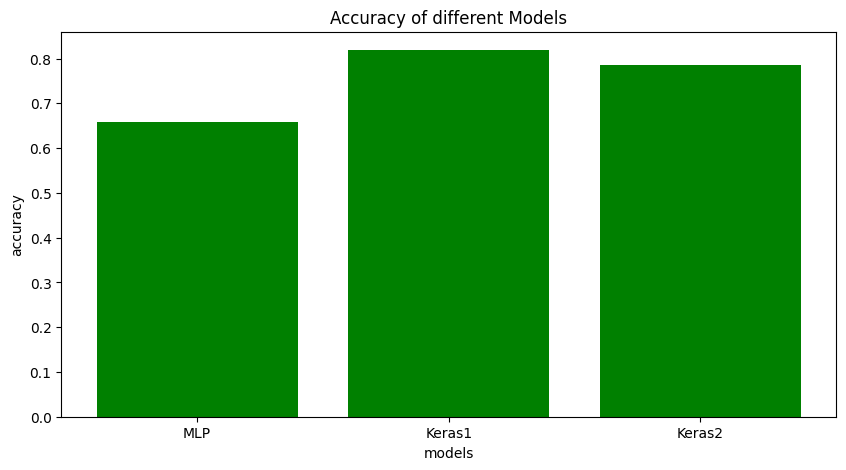

In [248]:
models = ["MLP", "Keras1", "Keras2"]
accuracy =[0.658, 0.819, 0.785]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color="green")
plt.xlabel("models")
plt.ylabel("accuracy")
plt.title("Accuracy of different Models")
plt.show()